In [1]:
import numpy as np

# Given values
intercept = -3.5
coefficient = 1.2
hours_studied = 4.5

# Logistic regression equation
probability = 1 / (1 + np.exp(-(intercept + coefficient * hours_studied)))
probability

np.float64(0.8698915256370021)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_classification

In [5]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [7]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224


In [10]:
y[:50] # sliced for display purposes

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Model training 
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [13]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = logistic.predict(X_test)
print(y_pred)

[0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 1 1 0]


In [18]:
logistic.predict_proba(X_test)[:10]  # Predicted probabilities

array([[0.77447791, 0.22552209],
       [0.0336685 , 0.9663315 ],
       [0.67068215, 0.32931785],
       [0.0798668 , 0.9201332 ],
       [0.97661665, 0.02338335],
       [0.04135728, 0.95864272],
       [0.97902877, 0.02097123],
       [0.95936726, 0.04063274],
       [0.80852005, 0.19147995],
       [0.68495432, 0.31504568]])

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [21]:
score = accuracy_score(y_test, y_pred)
print(score)

0.8466666666666667


In [22]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[118  17]
 [ 29 136]]


In [23]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



<Axes: >

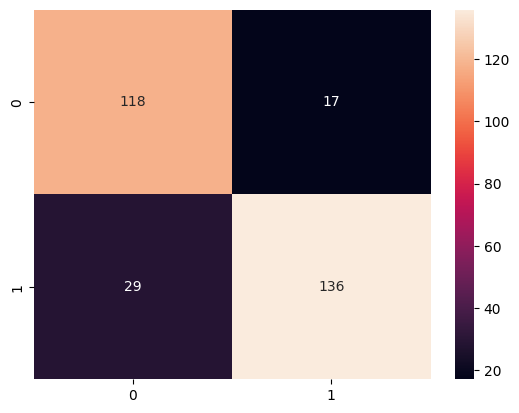

In [24]:
sns.heatmap(cm, annot=True, fmt='d')

#### Hyperparameter Tuning and Cross Validation

In [81]:
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [82]:
dict(penalty=penalty, C=c_values, solver=solver)

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [103]:
params = [
    {'penalty': ['l2'], 'C': c_values, 'solver': ['newton-cg', 'lbfgs', 'sag']},
    {'penalty': ['l1'], 'C': c_values, 'solver': ['liblinear', 'saga']},
    {'penalty': ['elasticnet'], 'C': c_values, 'solver': ['saga'], 'l1_ratio': [0.5]},
]

In [104]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)

In [105]:
# Grid search CV
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='accuracy', n_jobs=-1)

In [106]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'sag']},
                         {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [100, 10, 1.0, 0.1, 0.01], 'l1_ratio': [0.5],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy')

In [107]:
print(grid)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'sag']},
                         {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [100, 10, 1.0, 0.1, 0.01], 'l1_ratio': [0.5],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy')


In [108]:
grid.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'sag']},
                         {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [100, 10, 1.0, 0.1, 0.01], 'l1_ratio': [0.5],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy')

In [109]:
grid.best_params_ 

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [110]:
grid.best_score_

np.float64(0.8785714285714287)

In [111]:
grid.predict(X_test)

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [112]:
score = accuracy_score(y_test, y_pred)
print(score)

0.8466666666666667


In [113]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[118  17]
 [ 29 136]]


In [114]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



### Randomized SearchCV

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
randomCV = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, scoring='accuracy')

In [117]:
randomCV.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions=[{'C': [100, 10, 1.0, 0.1, 0.01],
                                         'penalty': ['l2'],
                                         'solver': ['newton-cg', 'lbfgs',
                                                    'sag']},
                                        {'C': [100, 10, 1.0, 0.1, 0.01],
                                         'penalty': ['l1'],
                                         'solver': ['liblinear', 'saga']},
                                        {'C': [100, 10, 1.0, 0.1, 0.01],
                                         'l1_ratio': [0.5],
                                         'penalty': ['elasticnet'],
                                         'solver': ['saga']}],
                   scoring='accuracy')

In [118]:
randomCV.best_score_

np.float64(0.8785714285714287)

In [119]:
randomCV.best_params_

{'solver': 'sag', 'penalty': 'l2', 'C': 0.01}

In [121]:
y_pred = randomCV.predict(X_test)

In [122]:
score = accuracy_score(y_test, y_pred)
print(score)

0.8533333333333334


In [123]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[124  11]
 [ 33 132]]


In [124]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



#### Logistic Regression for Multiclass Classification Problem

In [125]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=3, random_state=42)

In [129]:
X[[0, 1, 2, 3, 4]] # Displaying the first 5 rows

array([[ 0.7715326 , -1.47433614,  2.19664605, -0.67899174,  0.76747934,
        -1.22617936, -0.23756628,  0.68174341,  1.08996189,  0.96250289],
       [ 1.85838284, -3.68087983,  0.22749588, -3.81836772,  0.63596775,
         1.60952067, -0.15313504, -0.47417818,  1.34113888, -0.77177196],
       [-0.98724764,  1.53916836,  0.5859042 ,  1.18528138, -0.73677014,
        -1.40681501,  0.68478283, -0.32202815, -1.45103394,  1.32543211],
       [-1.02241959,  1.3817867 ,  2.01527511,  0.86143427,  1.29064446,
        -1.88964929,  1.00913804,  0.36311563, -1.84423789,  0.31110999],
       [-0.13116121, -2.07900845,  1.48374391,  1.63685752, -0.7348109 ,
        -0.64015446,  2.66642175, -1.08574771, -0.89285099,  0.02979617]])

In [128]:
y[:50] # sliced for display purposes

array([1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1,
       2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1,
       2, 0, 2, 0, 2, 0])

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [131]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class= 'ovr')
logistic.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [132]:
y_pred = logistic.predict(X_test)

In [133]:
y_pred[:10] # Displaying the first 10 predictions

array([2, 0, 1, 2, 0, 1, 2, 0, 0, 2])

In [134]:
score = accuracy_score(y_test, y_pred)
print(score)

0.68


In [135]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[79 16  8]
 [31 38 27]
 [ 3 11 87]]


In [136]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       103
           1       0.58      0.40      0.47        96
           2       0.71      0.86      0.78       101

    accuracy                           0.68       300
   macro avg       0.67      0.67      0.66       300
weighted avg       0.67      0.68      0.66       300

